In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
data_som = pd.read_csv('/home/hasan/Documents/BitRepos/orocv2/input (1).csv')

In [36]:
data_hum = pd.read_csv('/home/hasan/Documents/BitRepos/orocv2/human_simrating.csv')

In [37]:
data_dist = pd.read_csv('/home/hasan/Documents/BitRepos/orocv2/distance_data.csv', delimiter=',', encoding="utf-8-sig")

In [38]:
data_hum.head()

,object1,object2,similarity
0,Cup,Bowl,4.8
1,Book,Newspaper,4.6
2,Newspaper,Book,5.2
3,Vase,Container,4.8
4,Wallpaper,Newspaper,3.4


In [39]:
data_som.head()

,item1_title,item2_title,material,shape
0,Cup,Bowl,7.0,0.0
1,Book,Newspaper,7.0,7.0
2,Newspaper,Book,7.0,7.0
3,Vase,Container,5.2,7.0
4,Wallpaper,Newspaper,7.0,4.3


In [40]:
data_dist.head()

,item1_title,item2_title,material_dist,shape_dist
0,Cup,Bowl,0.0881,0.0068
1,Book,Newspaper,0.0218,0.0013
2,Newspaper,Book,0.0218,0.0013
3,Vase,Container,0.0778,0.0068
4,Wallpaper,Newspaper,0.0218,0.0617


In [41]:
data_dist["avg"]  = data_dist.mean(axis=1)

In [42]:
data_dist.head()

,item1_title,item2_title,material_dist,shape_dist,avg
0,Cup,Bowl,0.0881,0.0068,0.04745
1,Book,Newspaper,0.0218,0.0013,0.01155
2,Newspaper,Book,0.0218,0.0013,0.01155
3,Vase,Container,0.0778,0.0068,0.04230
4,Wallpaper,Newspaper,0.0218,0.0617,0.04175


In [43]:
data_som['avg'] = data_som.mean(axis=1)

In [44]:
data_som['hum_similairty'] = data_hum["similarity"]

In [45]:
data_som= data_som.rename(columns={'avg': 'som_similairty'})

In [46]:
data_som["object"]= data_som["item1_title"].map(str)+"-"+data_som["item2_title"]

In [47]:
data_som["material_dist"] = data_dist["material_dist"]

In [48]:
data_som["shape_dist"] = data_dist["shape_dist"]

In [49]:
data_som["dist_avg"] = data_dist["avg"]

In [50]:
data_som.head()

,item1_title,item2_title,material,shape,som_similairty,hum_similairty,object,material_dist,shape_dist,dist_avg
0,Cup,Bowl,7.0,0.0,3.50,4.8,Cup-Bowl,0.0881,0.0068,0.04745
1,Book,Newspaper,7.0,7.0,7.00,4.6,Book-Newspaper,0.0218,0.0013,0.01155
2,Newspaper,Book,7.0,7.0,7.00,5.2,Newspaper-Book,0.0218,0.0013,0.01155
3,Vase,Container,5.2,7.0,6.10,4.8,Vase- Container,0.0778,0.0068,0.04230
4,Wallpaper,Newspaper,7.0,4.3,5.65,3.4,Wallpaper- Newspaper,0.0218,0.0617,0.04175


Text(0, 0.5, 'similarity')

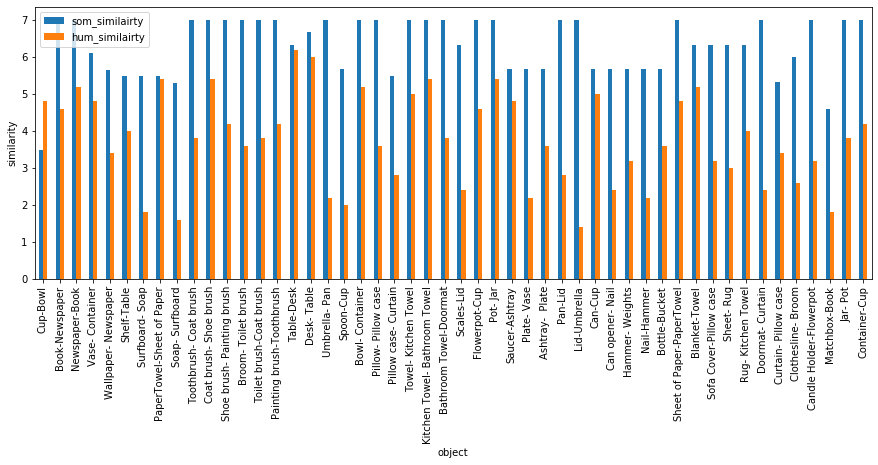

In [51]:
ax=data_som.plot(figsize=(15,5),x="object",y=['som_similairty','hum_similairty'],kind='bar')
ax.set_ylabel("similarity")

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_som[[" material"," shape","som_similairty","hum_similairty","material_dist","shape_dist","dist_avg"]] = scaler.fit_transform(data_som[[" material"," shape","som_similairty","hum_similairty","material_dist","shape_dist","dist_avg"]])

In [53]:
data_som

,item1_title,item2_title,material,shape,som_similairty,hum_similairty,object,material_dist,shape_dist,dist_avg
0,Cup,Bowl,1.0,0.000000,0.000000,0.708333,Cup-Bowl,1.000000,0.008634,0.095952
1,Book,Newspaper,1.0,1.000000,1.000000,0.666667,Book-Newspaper,0.156489,0.001651,0.010476
2,Newspaper,Book,1.0,1.000000,1.000000,0.791667,Newspaper-Book,0.156489,0.001651,0.010476
3,Vase,Container,0.0,1.000000,0.742857,0.708333,Vase- Container,0.868957,0.008634,0.083690
4,Wallpaper,Newspaper,1.0,0.614286,0.614286,0.416667,Wallpaper- Newspaper,0.156489,0.078339,0.082381
5,Shelf,Table,1.0,0.571429,0.571429,0.541667,Shelf-Table,0.030534,0.660995,0.616905
6,Surfboard,Soap,1.0,0.571429,0.571429,0.083333,Surfboard- Soap,0.184478,0.732605,0.698452
7,PaperTowel,Sheet of Paper,1.0,0.571429,0.571429,0.833333,PaperTowel-Sheet of Paper,0.156489,0.850305,0.806190
8,Soap,Surfboard,1.0,0.514286,0.514286,0.041667,Soap- Surfboard,0.184478,0.732605,0.698452
9,Toothbrush,Coat brush,1.0,1.000000,1.000000,0.500000,Toothbrush- Coat brush,0.184478,0.000000,0.011548


In [54]:


data_som=data_som.rename(columns={" material":"hum_m"," shape":"hum_s","som_similairty":"mean(hum_s,hum_m)","hum_similairty":"hum_simRating","material_dist":"som_material","shape_dist":"som_shape","dist_avg":"mean(som_mat,som_shape)"})

In [55]:
data_som

,item1_title,item2_title,hum_m,hum_s,"mean(hum_s,hum_m)",hum_simRating,object,som_material,som_shape,"mean(som_mat,som_shape)"
0,Cup,Bowl,1.0,0.000000,0.000000,0.708333,Cup-Bowl,1.000000,0.008634,0.095952
1,Book,Newspaper,1.0,1.000000,1.000000,0.666667,Book-Newspaper,0.156489,0.001651,0.010476
2,Newspaper,Book,1.0,1.000000,1.000000,0.791667,Newspaper-Book,0.156489,0.001651,0.010476
3,Vase,Container,0.0,1.000000,0.742857,0.708333,Vase- Container,0.868957,0.008634,0.083690
4,Wallpaper,Newspaper,1.0,0.614286,0.614286,0.416667,Wallpaper- Newspaper,0.156489,0.078339,0.082381
5,Shelf,Table,1.0,0.571429,0.571429,0.541667,Shelf-Table,0.030534,0.660995,0.616905
6,Surfboard,Soap,1.0,0.571429,0.571429,0.083333,Surfboard- Soap,0.184478,0.732605,0.698452
7,PaperTowel,Sheet of Paper,1.0,0.571429,0.571429,0.833333,PaperTowel-Sheet of Paper,0.156489,0.850305,0.806190
8,Soap,Surfboard,1.0,0.514286,0.514286,0.041667,Soap- Surfboard,0.184478,0.732605,0.698452
9,Toothbrush,Coat brush,1.0,1.000000,1.000000,0.500000,Toothbrush- Coat brush,0.184478,0.000000,0.011548


In [56]:
data_som.corr()

,hum_m,hum_s,"mean(hum_s,hum_m)",hum_simRating,som_material,som_shape,"mean(som_mat,som_shape)"
hum_m,1.000000,0.023853,0.247777,0.075961,-0.325546,-0.039462,-0.072687
hum_s,0.023853,1.000000,0.974452,0.245234,-0.121126,-0.524336,-0.531147
"mean(hum_s,hum_m)",0.247777,0.974452,1.000000,0.254720,-0.190520,-0.516996,-0.531061
hum_simRating,0.075961,0.245234,0.254720,1.000000,0.123111,-0.258279,-0.242739
som_material,-0.325546,-0.121126,-0.190520,0.123111,1.000000,0.053671,0.156464
som_shape,-0.039462,-0.524336,-0.516996,-0.258279,0.053671,1.000000,0.994658
"mean(som_mat,som_shape)",-0.072687,-0.531147,-0.531061,-0.242739,0.156464,0.994658,1.000000


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in data_som[[" material"," shape","som_similairty","hum_similairty","material_dist","shape_dist","dist_avg"]]:
    sns.regplot(data_som[var],data_som["hum_similairty"])
    plt.show()

KeyError: "None of [Index([' material', ' shape', 'som_similairty', 'hum_similairty',\n       'material_dist', 'shape_dist', 'dist_avg'],\n      dtype='object')] are in the [columns]"